# Pràctica 2: La regressió

## Objectius

Els objectius d'aquesta pràctica són:
* Aplicar models de regressió, ficant l'èmfasi en:
 * Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
 * Avaluar correctament l'error del model 
 * Visualitzar les dades i el model resultant
 * Saber aplicar el procès de descens del gradient

* Ésser capaç d'aplicar tècniques de regressió en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Generalment, per tal de que veigueu varietat de dades i problematiques, es treballarà sobre dues bases de dades cada setmana. La primera serà comuna per tothom i, en aquest cas, tindrá la temática del COVID. La segona, tot i ser de lliure elecció (us deixem que l'escolliu vosaltres mateixos), haurà de tenir uns mínims de dificultat (o almenys, que tinguin una mica de gràcia). 


#### COVID data

Durant el primer mes, treballarem amb una base de dades comuna, amb la temática del COVID-19. Podeu trobar la darrera actualització a [OWID DATA](https://github.com/owid/covid-19-data/tree/master/public/data), tot i que no farem servir cap dada a partir del 1 de Octubre de 2020, per això us recomanem de fer servir la que tenim penjada al Campus Virtual.

#### Dataset lliure elecció
Podeu trobar datasets de dades a qualsevol d'aquestes dues webs:
* https://www.kaggle.com/datasets?search=machine+learning
* https://archive.ics.uci.edu/ml/datasets.php

L'objectiu será escollir un dataset adequat per la tasca que volem realitzar. LLavors, el primer apartat serà conèixer la base de dades que es té entre mans. S'han d'analitzar els diferents atributs que la composen, entendre'ls i, si no està estipulat, **caldrà fixar quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades**, justificant el per què de la decisió (és útil i representatiu pel problema, per exemple, donat un conjunt de dades sobre persones: edat, gènere, pes, alçada, risc de patir càncer, aquesta última pot ser justificada com la de més interés). També podeu mirar que l'atribut objectiu tingui valors que canvien. Per exemple, no té sentit predir un atribut on el 99% dels valors són 0, i hi ha algun 1.


### Pràctica 2: Regressió Lineal i Polinomial
En la pràctica 1, es presenten diversos problemes per comprendre els mètodes de regressió numèrica. Cada apartat pot tenir una qualificació diferent.

* A. Exploració de la base de dades (30%)
* B. Ús de regressor Lineal (30%)
* C. Demostració d'assoliment (A+B en una nova BBDD) (20%)
* D. Implementació Regressor Lineal (20%)
* (Extra) Implementació Regresor polinomial (+10%, max: 10pts)



A continuació us posem un esquelet de codi que podeu tenir com a referència (o no)

In [226]:
# Codi esquelet per la pràctica de la 2 sessió: Regressió Lineal i Polinomial

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
sns.set_theme()


# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('owid-covid-data.csv')

print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (47328, 41)


A continuació veurem algunes taules i gràfiques per entendre com són les dades que tenim:

In [227]:
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.000,2.000,nan,0.000,0.000,nan,18.733,18.733,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
1,ABW,North America,Aruba,2020-03-19,nan,nan,0.286,nan,nan,0.000,nan,nan,2.676,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,33.330,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
2,ABW,North America,Aruba,2020-03-20,4.000,2.000,0.286,0.000,0.000,0.000,37.465,18.733,2.676,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,33.330,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
3,ABW,North America,Aruba,2020-03-21,nan,nan,0.286,nan,nan,0.000,nan,nan,2.676,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
4,ABW,North America,Aruba,2020-03-22,nan,nan,0.286,nan,nan,0.000,nan,nan,2.676,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47323,NaN,NaN,International,2020-09-27,696.000,nan,nan,7.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
47324,NaN,NaN,International,2020-09-28,696.000,nan,nan,7.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
47325,NaN,NaN,International,2020-09-29,696.000,nan,nan,7.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
47326,NaN,NaN,International,2020-09-30,696.000,nan,nan,7.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [3]:
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,46714.000,46502.000,45720.000,46714.000,46502.000,45720.000,46438.000,46438.000,45655.000,46438.000,46438.000,45655.000,17022.000,17430.000,17430.000,17022.000,19196.000,19196.000,17665.000,18098.000,39364.000,47052.000,44901.000,42195.000,41567.000,41976.000,41649.000,27790.000,42203.000,43693.000,33054.000,32635.000,19766.000,38120.000,46458.000,40717.000
mean,105304.798,1463.590,1451.104,4181.072,43.656,43.712,1967.496,25.122,24.747,58.924,0.568,0.567,23599.478,1572278.393,55.184,0.745,22774.285,0.729,173.259,0.065,57.369,88300500.969,360.499,31.319,9.256,5.854,20893.575,12.127,251.593,8.049,10.811,32.635,52.445,3.110,74.023,0.725
std,1089825.655,13268.625,13077.552,38853.696,367.208,357.460,4142.360,75.623,58.381,144.982,2.993,1.900,96057.307,6965831.413,110.468,1.432,87943.651,1.295,887.276,0.091,27.398,612410778.511,1654.659,9.027,6.318,4.315,20427.288,19.229,117.530,4.148,10.479,13.420,31.603,2.526,7.373,0.153
min,0.000,-8261.000,-552.000,0.000,-1918.000,-232.143,0.000,-2212.545,-269.978,0.000,-67.901,-9.678,-3743.000,1.000,0.000,-0.398,0.000,0.000,1.488,0.000,0.000,809.000,0.137,15.100,1.144,0.526,661.240,0.100,79.370,0.990,0.100,7.700,1.188,0.100,53.280,0.354
25%,62.000,0.000,0.571,1.000,0.000,0.000,32.357,0.000,0.149,0.026,0.000,0.000,991.250,47101.250,2.755,0.062,1066.000,0.063,11.656,0.008,38.890,1399491.000,37.728,23.300,3.552,2.142,5338.454,0.500,155.898,5.310,1.900,21.400,21.222,1.300,69.910,0.606
50%,1067.000,10.000,15.143,21.000,0.000,0.143,290.308,1.594,3.014,5.114,0.000,0.021,3333.500,198537.000,14.550,0.292,3723.500,0.307,32.850,0.029,62.960,8654618.000,88.125,31.400,6.981,4.419,14103.452,1.900,238.339,7.110,6.400,31.400,55.182,2.500,75.445,0.754
75%,11496.000,168.000,173.465,248.000,3.000,3.143,2047.809,18.209,20.044,36.511,0.206,0.297,12178.250,777617.000,61.396,0.869,13095.500,0.870,106.647,0.084,79.630,31072945.000,214.243,39.700,14.762,9.473,32415.132,16.000,318.991,10.180,19.600,40.900,83.741,4.200,79.380,0.853
max,34029923.000,321127.000,297041.143,1015043.000,10491.000,7456.714,43650.601,4944.376,882.924,1237.551,215.382,63.140,1492409.000,113263096.000,1327.460,25.920,1169107.000,19.058,47299.000,0.672,100.000,7794798729.000,19347.500,48.200,27.049,18.493,116935.600,77.600,724.417,23.360,44.000,78.100,98.999,13.800,86.750,0.953


In [4]:
covid_spain = dataset[dataset.location=="Spain"]
covid_italy = dataset[dataset.location=="Italy"]
covid_spain

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
13450,ESP,Europe,Spain,2019-12-31,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13451,ESP,Europe,Spain,2020-01-01,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13452,ESP,Europe,Spain,2020-01-02,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13453,ESP,Europe,Spain,2020-01-03,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13454,ESP,Europe,Spain,2020-01-04,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13720,ESP,Europe,Spain,2020-09-26,716481.000,0.000,10920.143,31232.000,0.000,105.286,15324.229,0.000,233.562,667.996,0.000,2.252,94782.000,9533306.000,203.900,2.027,105165.000,2.249,9.630,0.104,tests performed,55.090,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13721,ESP,Europe,Spain,2020-09-27,716481.000,0.000,10920.143,31232.000,0.000,105.286,15324.229,0.000,233.562,667.996,0.000,2.252,64576.000,9597882.000,205.281,1.381,99074.000,2.119,9.073,0.110,tests performed,55.090,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13722,ESP,Europe,Spain,2020-09-28,748266.000,31785.000,10971.143,31411.000,179.000,106.857,16004.052,679.823,234.653,671.824,3.828,2.285,nan,nan,nan,nan,nan,nan,nan,nan,NaN,55.090,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13723,ESP,Europe,Spain,2020-09-29,758172.000,9906.000,10843.571,31614.000,203.000,101.429,16215.924,211.871,231.924,676.166,4.342,2.169,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891


In [228]:
dataset["datetime"] = pd.to_datetime(dataset["date"], format='%Y-%m-%d', errors='ignore')

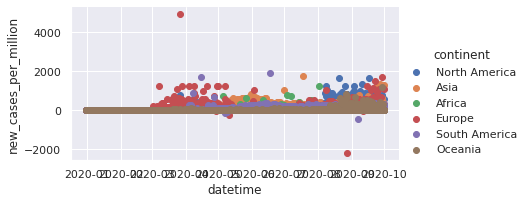

In [6]:
fg = sns.FacetGrid(data=dataset, hue='continent',aspect=2)
fg.map(plt.scatter, 'datetime', 'new_cases_per_million').add_legend()

Quina correlació entre aquests atributs hi veieu?


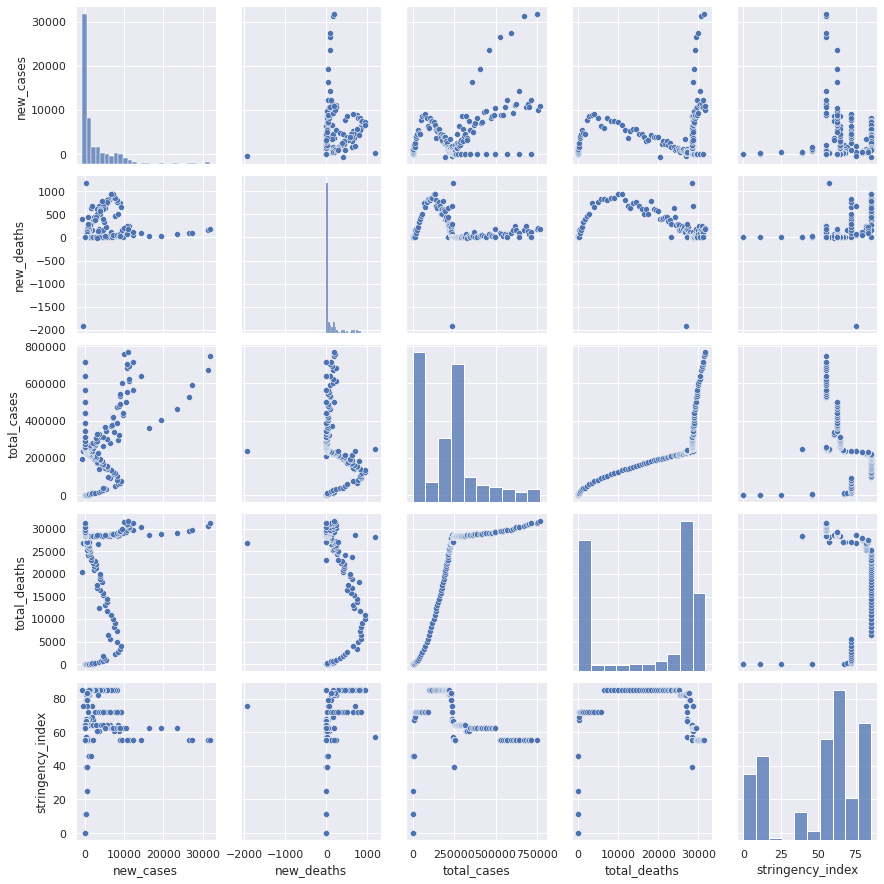

In [7]:
print("Quina correlació entre aquests atributs hi veieu?")

selected_columns = ["location", "new_cases", "new_deaths", "total_cases", "total_deaths", "stringency_index"]
sns.pairplot(covid_spain[selected_columns])
plt.show()

Què passa si utilitzem les dades smoothed?


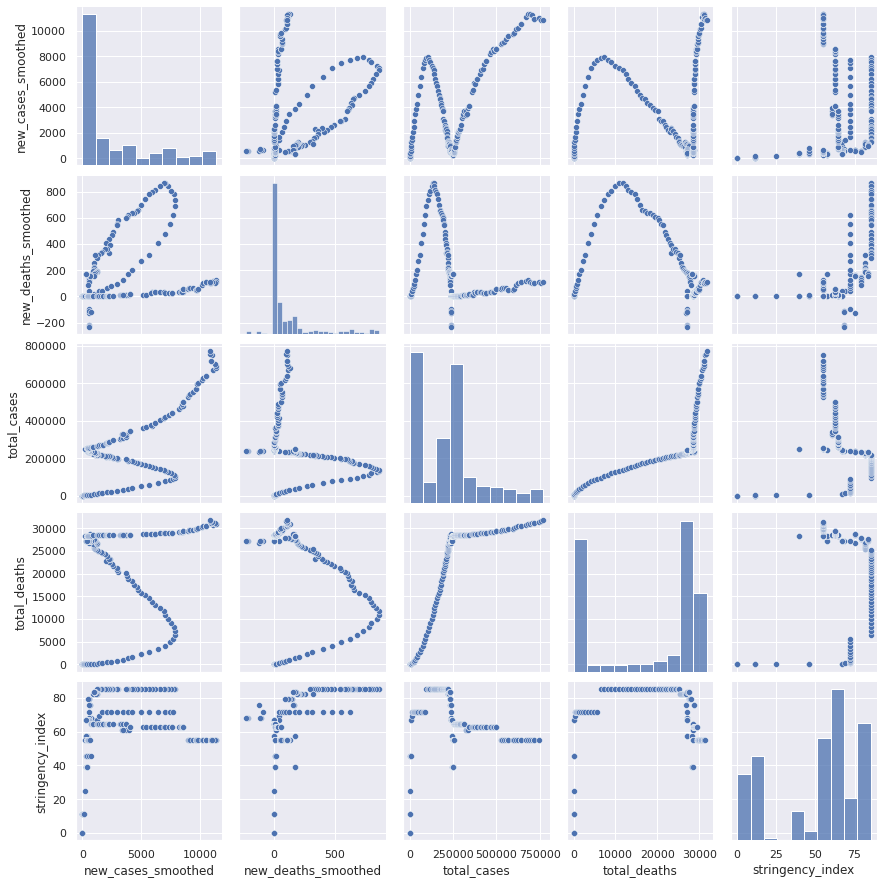

In [8]:
print("Què passa si utilitzem les dades smoothed?")

selected_columns = ["location", "new_cases_smoothed", "new_deaths_smoothed", "total_cases", "total_deaths", "stringency_index"]
sns.pairplot(covid_spain[selected_columns])
plt.show()

In [9]:
print("I si busquem alguna correlació entre paisos per un dia concret?")

covid_agost = dataset[dataset.date=="2020-08-01"]
covid_agost

I si busquem alguna correlació entre paisos per un dia concret?


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,datetime
136,ABW,North America,Aruba,2020-08-01,121.000,1.000,0.429,3.000,0.000,0.000,1133.320,9.366,4.014,28.099,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,32.410,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan,2020-08-01
412,AFG,Asia,Afghanistan,2020-08-01,36710.000,168.000,96.286,1283.000,12.000,5.286,943.015,4.316,2.473,32.958,0.308,0.136,nan,nan,nan,nan,nan,nan,nan,nan,NaN,78.700,38928341.000,54.422,18.600,2.581,1.337,1803.987,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.498,2020-08-01
606,AGO,Africa,Angola,2020-08-01,1109.000,31.000,36.857,51.000,3.000,2.571,33.743,0.943,1.121,1.552,0.091,0.078,nan,nan,nan,nan,nan,nan,nan,nan,NaN,79.170,32866268.000,23.890,16.800,2.405,1.362,5819.495,nan,276.045,3.940,nan,nan,26.664,nan,61.150,0.581,2020-08-01
795,AIA,North America,Anguilla,2020-08-01,3.000,0.000,0.000,0.000,0.000,0.000,199.973,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,24.070,15002.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,81.880,nan,2020-08-01
1002,ALB,Europe,Albania,2020-08-01,5276.000,79.000,100.857,157.000,3.000,4.143,1833.345,27.452,35.047,54.556,1.042,1.440,nan,nan,nan,nan,nan,nan,nan,nan,NaN,59.260,2877800.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,nan,2.890,78.570,0.785,2020-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46322,ZAF,Africa,South Africa,2020-08-01,493183.000,11014.000,10169.571,8005.000,193.000,237.429,8315.527,185.706,171.468,134.972,3.254,4.003,42450.000,3001985.000,50.616,0.716,38739.000,0.653,3.809,0.263,people tested,80.560,59308690.000,46.754,27.300,5.344,3.053,12294.876,18.900,200.380,5.520,8.100,33.200,43.993,2.320,64.130,0.699,2020-08-01
46519,ZMB,Africa,Zambia,2020-08-01,5963.000,408.000,301.000,151.000,2.000,3.000,324.359,22.193,16.373,8.214,0.109,0.163,1908.000,85001.000,4.624,0.104,1276.000,0.069,4.239,0.236,tests performed,50.930,18383956.000,22.995,17.700,2.480,1.542,3689.251,57.500,234.499,3.940,3.100,24.700,13.938,2.000,63.890,0.588,2020-08-01
46714,ZWE,Africa,Zimbabwe,2020-08-01,3169.000,77.000,124.714,67.000,14.000,5.000,213.215,5.181,8.391,4.508,0.942,0.336,1445.000,61577.000,4.143,0.097,1367.000,0.092,10.961,0.091,tests performed,80.560,14862927.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.535,2020-08-01
46990,OWID_WRL,NaN,World,2020-08-01,17577428.000,279062.000,259257.000,674453.000,6123.000,5666.000,2255.020,35.801,33.260,86.526,0.786,0.727,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,7794798729.000,58.045,30.900,8.696,5.355,15469.207,10.000,233.070,8.510,6.434,34.635,60.130,2.705,72.580,nan,2020-08-01


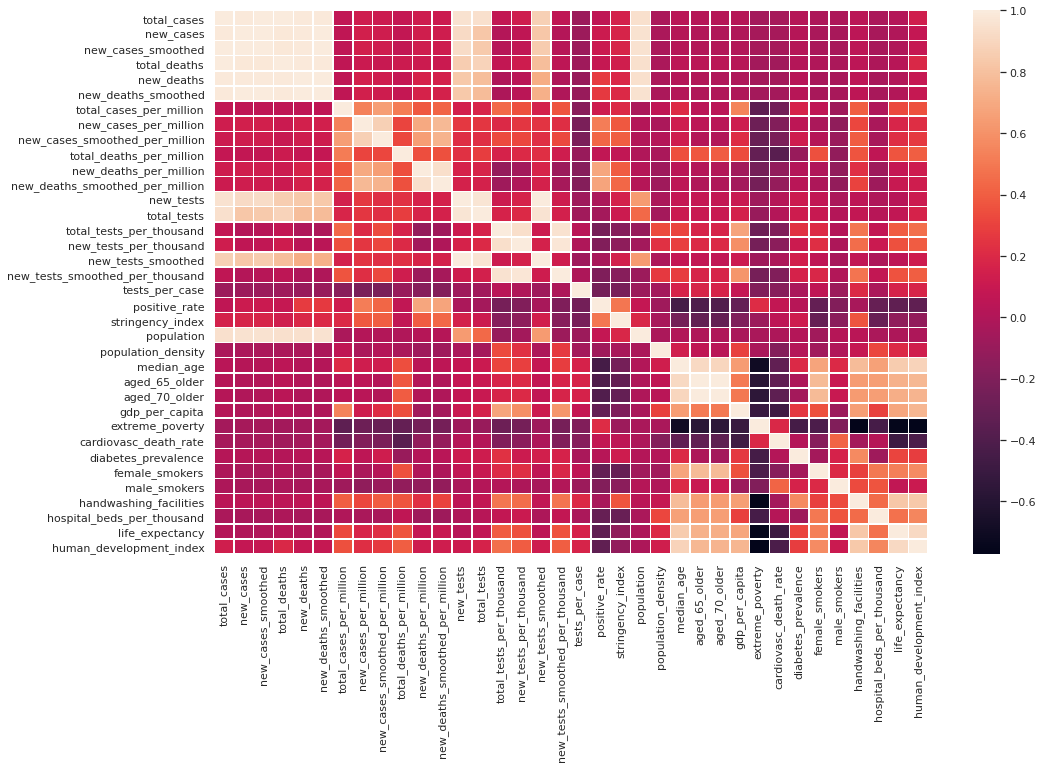

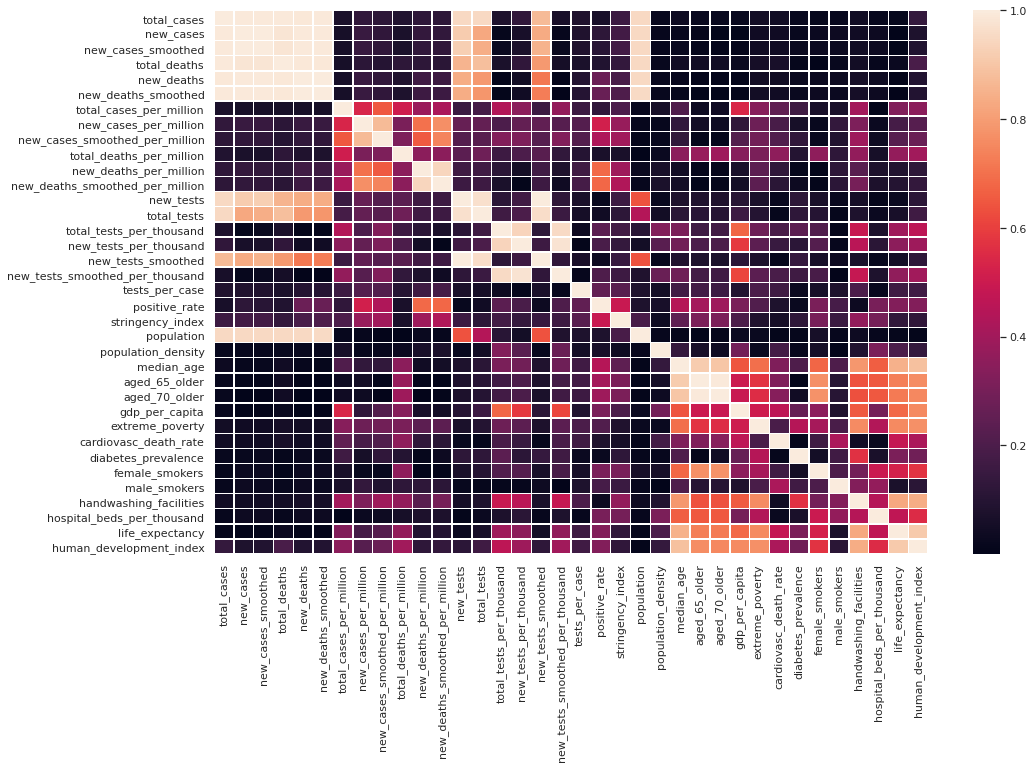

In [10]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(covid_agost.corr(), annot=False, fmt="f", linewidths=.5, ax=ax)
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(abs(covid_agost.corr()), annot=False, fmt="f", linewidths=.5, ax=ax)

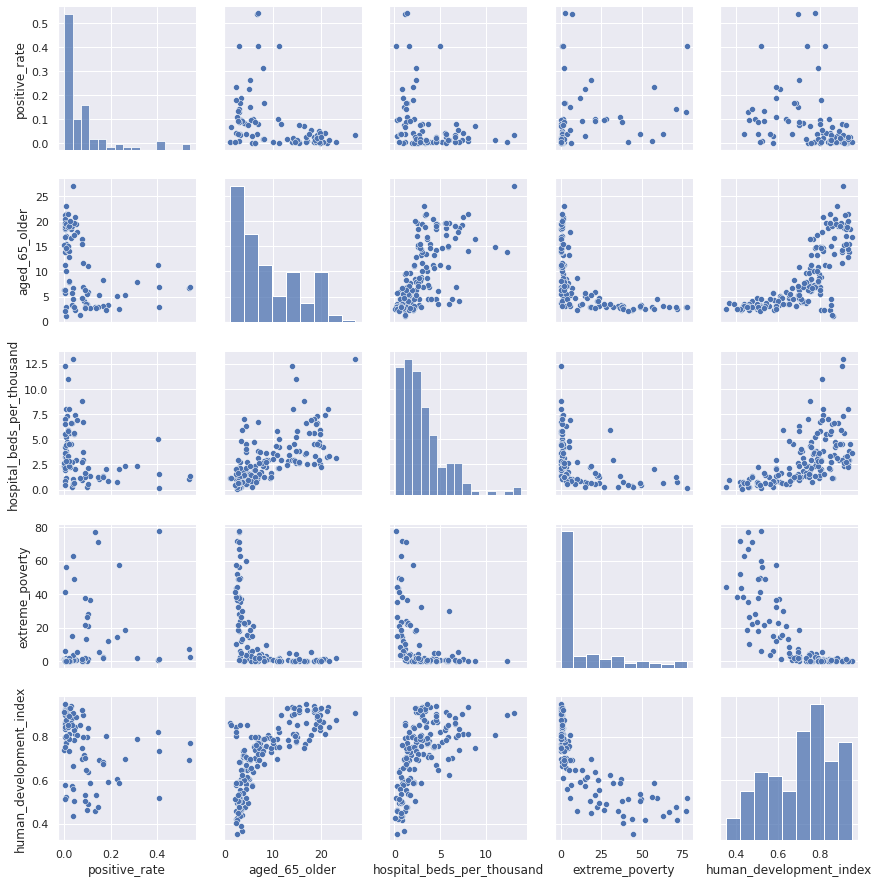

In [11]:
selected_columns = ["positive_rate", "aged_65_older", "hospital_beds_per_thousand", "extreme_poverty", "human_development_index"]
sns.pairplot(covid_agost[selected_columns])


A continuació, teniu unes funcions que de ben segur haurieu de completar per tal de poder respondre a les preguntes. Podeu implementar-les vosaltres mateixos i llavors comparar-les amb funcions de sklearn (si existeixen) 

In [198]:
def mostra_correlacions(data, param = 0.8): #per saber quin marge volem represenat
    corr = data.corr()
    corr = corr[1.0 > corr]
    corr = corr[corr > param]
    da = corr.dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0)
    mask = np.zeros_like(da)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(7, 7))
        ax = sns.heatmap(data = da, annot=False, fmt="f", linewidths=.3, ax=ax, mask = mask)



def normalitzador_de_dades(data):
    # TODO aplica algun tipus de normalitzador als atributs
    data = data.select_dtypes(include = [np.number])
    return (data - data.mean())/data.std()


def separar_train_test(data, target, ratio=0.8):
    # TODO retorna les dades en dos subconjunts diferents amb un ratio de 'ratio'
    from sklearn.model_selection import train_test_split
    data = data.select_dtypes(include = [np.number])
    data = data.fillna(method='ffill')
    data = data.fillna(value = 0.0)
    target = target.select_dtypes(include = [np.number])
    target = target.fillna(method='ffill')
    target = target.fillna(value = 0.0)
    data_train, data_test, target_train, target_test =  train_test_split(data, target, test_size=(1-ratio), shuffle = False)
    return data_train, data_test, target_train, target_test
    #data_train, data_test, target_train, target_test

def aplicar_regressor_lineal(data, target): #Falta una y
    from sklearn import linear_model
    
    data_train, data_test, target_train, target_test = separar_train_test(data, target)
    regr = linear_model.LinearRegression()
    regr.fit(data_train, target_train)
    pred = regr.predict(data_test)
    # TODO aplica un regressor lineal amb les dades per predir el target
    return pred, target_test #retornem prediccio i groundtruth

def calcula_metrica_error(pred, target, col, tipus = 'mse'):
    # TODO utilitza varies metriques segons la var "tipus" que analitzin les prediccions
    if tipus == "mse":
        return 1/(2 * len(pred)) * sum(abs(pred.flatten() - ground[col]))
    elif tipus == "r2":
        return 1/(2 * len(pred)) * sum((pred.flatten() - ground[col])**2)
    else:
        print ("Metrica {} no reconeguda".format(tipus))
        return -1


## A. Exploració de la base de dades (30%)

En aquest apartat aprendrem a analitzar les dades de la base de dades. Les següents funcions ens poden anar bé:

* [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
* [DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
* [DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
* [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Podeu veure algunes idees de 
https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction

Descripció dels camps:
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv



### Preguntes a respondre
1. Dimensionalitat de la BBDD. Quants exemples, quantes caracteristiques tenim.
2. Com són les caracteristiques?
3. Hi tenim totes les dades (quin % de dades tenim)
4. Quin tipus de atributs tenim a la base de dades.
5. Mostra els atributs més rellevants.
6. Quins atributs están més correlacionats. Mostra'ls.
7. Mostra (almenys) 5 tipus diferents de gràfiques sobre les dades.
8. Els valors es troben tots a la mateixa escala? Ens importa?
9. Quins atributs tenen una distribució Guassiana?
10. Quin és l'atribut objectiu? Per què?


## Respostes

**Les respostes no estan ordenades per pregunta formulada ja que he preferit agrupar la resposta d'algunes preguntes.**

La BD està formada per 47328 files i té 42 atributs. És a dir, sense tenir en compte els valors na, tenim 1987776 dades. 

La nostra BD és extensa i amb atributs variats ja que tenim atributs des de la mitjana d'edat de cada païs i el seu índex de desenvolupament humà fins al total de casos de covid, fet que ens facilitarà en un futur fer la relació entre els diferents atributs. Tenim 1 atribut tipus 'datetime', 3 atributs en format string, com el continent i el país i la resta d'atributs són atributs numèrics no normalitzats. 
La BD està completa però he trobat que sería interessant poder separar els atributs total de casos, nous casos, total de morts i noves morts també segons les franges d'edat per poder estudiar més a fons com es relacionen aquests atributs, així que en un petit sentit també podem dir que és incompleta.


Tal i com calculem en la cel·la següent, tenim un 79.33368749798771 % de les dades, el 20.67% restant es tracta de valors na.

Després de fer la representació dels valors de cada atribut (la cual he obviat en la resposta per la seva extensió) he vist que cap dels atributs segueix una distribució exactament Gaussiana, tot i que pel que es pot veure, els atributs total_cases i total_deaths evolucionaran de forma que en el temps potser segueixen una distribució Gaussiana.

No tots els valors es trben en la mateixa escala, el que ens pot donar conflictes i errors de càlculs en un futur. Per això és molt útil i important normalitzar les dades de la nostra BD per poder-les obtenir totes en un rang tancat. 

Els atributs més rellevants són aquells dels quals podem obtenir informació més interessant mitjançant una correlació amb un altre atribut, per les seves possibilitats de predicció de la evolució dels valors o per la informació que els propis valors del atribut ens donen.
En aquest cas, si mirem les correlacions (es mostren a les cel·les posteriors), podem veure quins atributs són els més interessants.
Podem veure com en la nostra BD, els atributs més interessants després del filtre de dades, són  "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests", "location"... Aquests resultats són d'esperar, ja que per un costat obtenim tots els atributs que ens interesa estudiar per predir l'evolució de la pandèmia i veiem com estan relacionats amb atributs com el continent o el datetime. Si estudiem a fons qualsevol dels atributs esmentats, podrem obtenir dades de la evolució de la pandèmia i extreure dades per poder veure com factors sociològics o mesures legals han afectat d"una manera o altra a la evolució de la COVID.

Així doncs, podem concloure que els nostres atributs objectius són tots aquells atributs directament relacionats amb la pandèmia, com el total de casos o el total de morts.


In [230]:
print(f'Tenim un {sum(dataset.count())/(dataset.shape[0]*dataset.shape[1]) * 100} % de dades.')

Tenim un 79.33368749798771 % de dades.


7. Les gràfiques

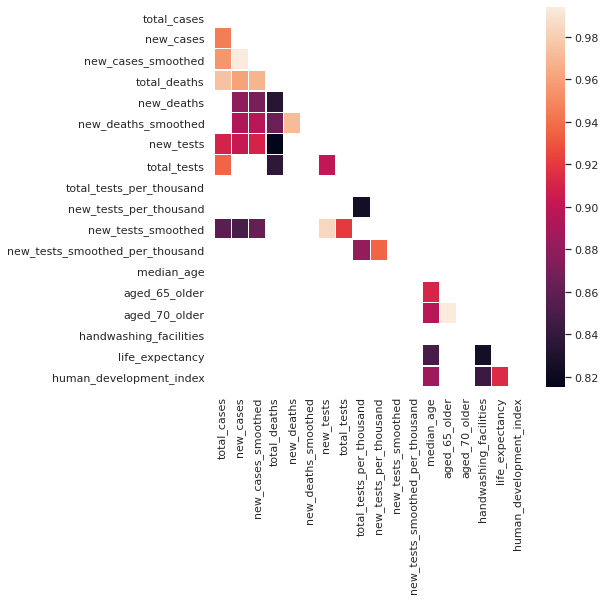

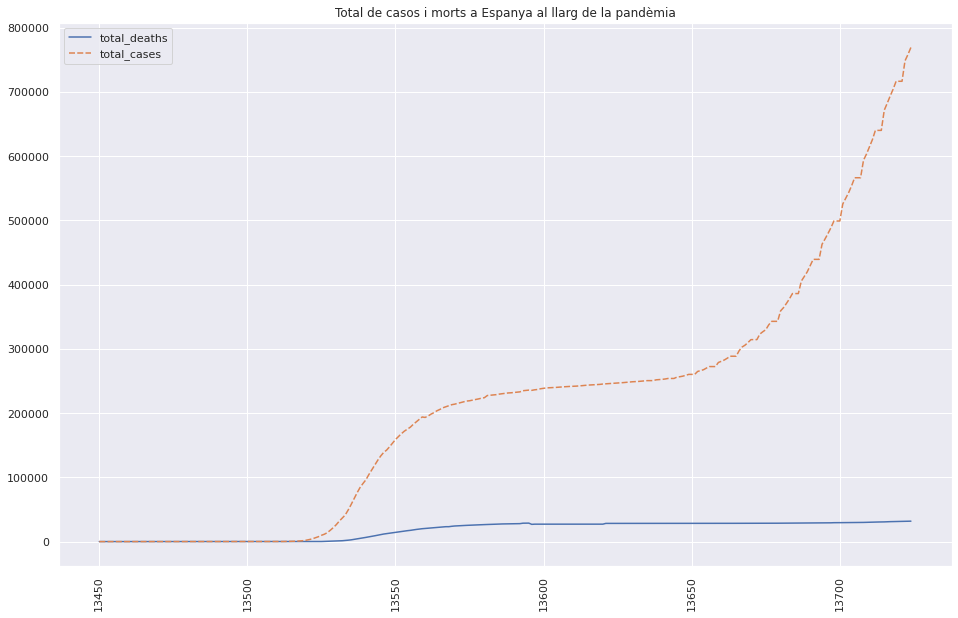

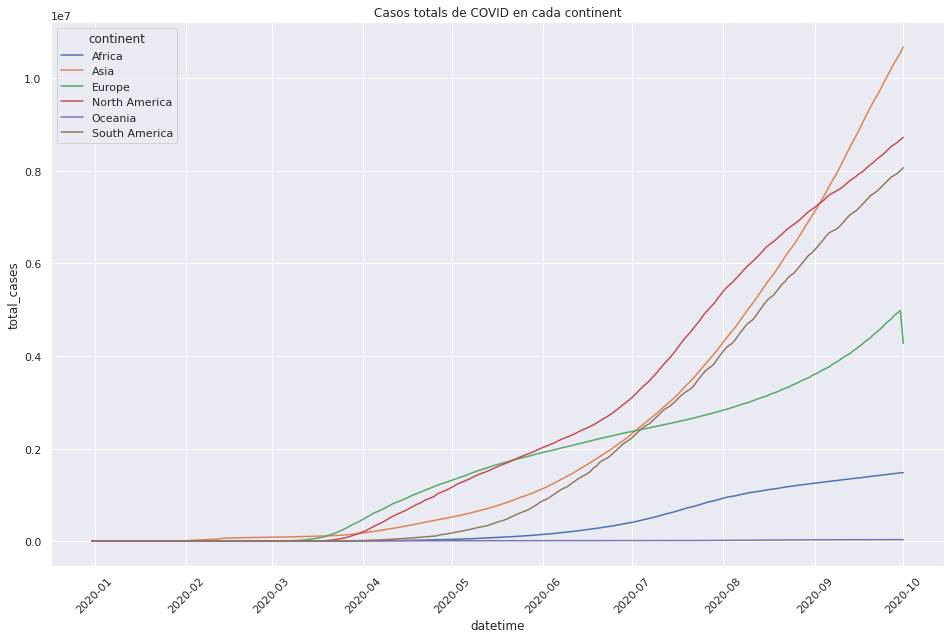

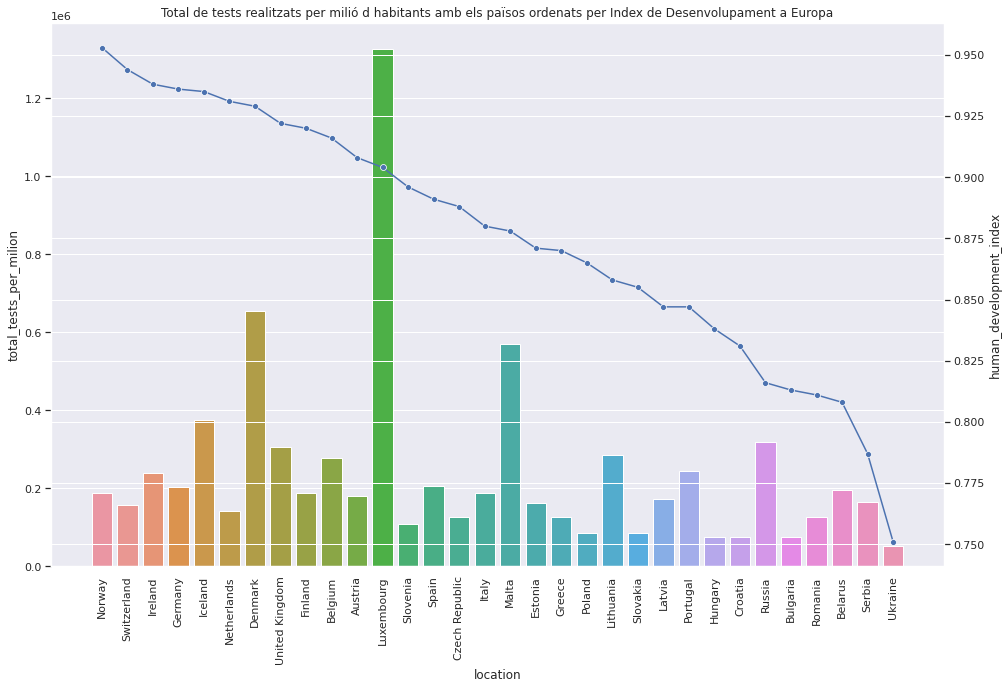

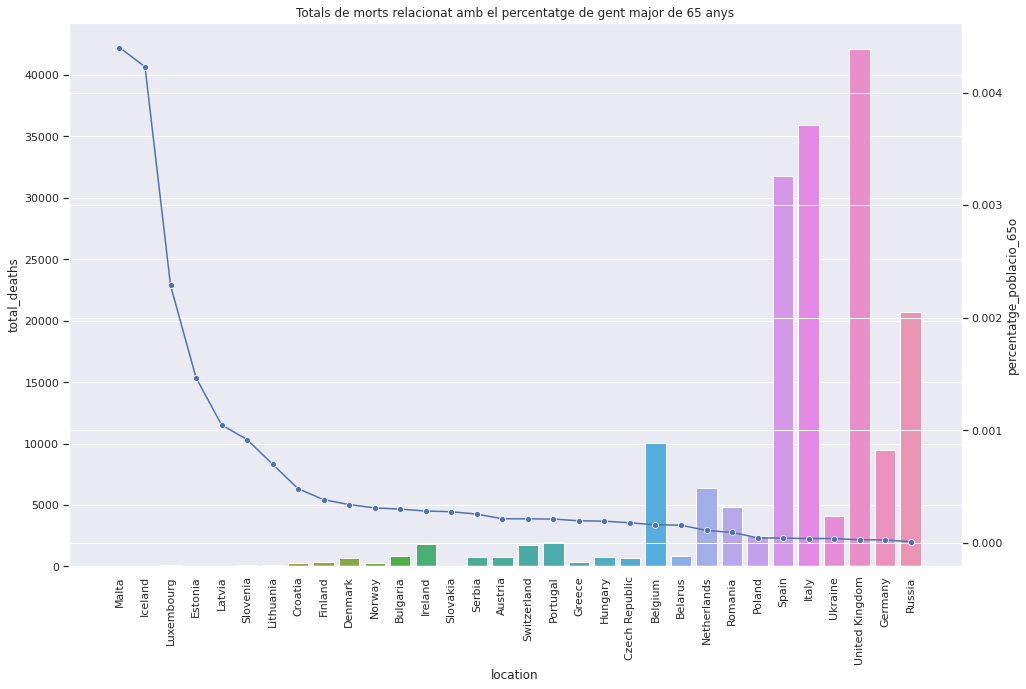

In [231]:
#correlacions
mostra_correlacions(dataset)

#total de casos i morts a Espanya
spain = dataset[['datetime','total_deaths', 'total_cases']][dataset.location == 'Spain']

f, ax = plt.subplots(figsize=(16, 10))
g = sns.lineplot(data = spain,ax = ax)
g.set_title('Total de casos i morts a Espanya al llarg de la pandèmia')
plt.xticks(rotation=90)
plt.show()

#Evolució dels casos de covid en els continents
nan = dataset[['continent', 'datetime','total_cases']].groupby( by = ['continent', 'datetime'], as_index = False).sum()

f, ax = plt.subplots(figsize=(16, 10))
g = sns.lineplot(data=nan, x = 'datetime', y = 'total_cases', hue = 'continent', ax = ax)
g.set_title('Casos totals de COVID en cada continent')
plt.xticks(rotation=45)
plt.show()

#Pairplot entre els paisos més i menys desenvolupats d'Europa
eur = dataset[dataset.continent == 'Europe']
eur = eur[['continent', 'location', 'human_development_index', 'population', 'population_density', 'total_cases', 'total_deaths', 'total_tests', 'total_cases_per_million', 'total_deaths_per_million', 'aged_65_older']].groupby(by = ['location'], as_index= False).max()
eur['total_tests_per_milion'] = eur['total_tests']/(eur['population']/1000000)
#eur[eur.human_development_index == eur.human_development_index.max()]
eur = eur.sort_values(by = 'human_development_index', ascending = False)
eur = eur.loc[eur.human_development_index.notna(), :]
eur = eur.loc[eur.total_tests_per_milion.notna(), :]
#Dades netes ordenades per índex de desenvolupament agrupades per països var eur
f, ax = plt.subplots(figsize=(16, 10))
g = sns.barplot(data = eur, x = 'location', y = 'total_tests_per_milion', ax = ax)
plt.xticks(rotation=90)
ax2 = ax.twinx()
g = sns.lineplot(data = eur, x = 'location', y = 'human_development_index',marker = 'o', ax =  ax2)
g.set_title('Total de tests realitzats per milió d habitants amb els països ordenats per Index de Desenvolupament a Europa')
plt.xticks(rotation=90)
plt.show()

#plot de mortalitat per edat
eur['percentatge_poblacio_65o'] = (eur.aged_65_older / eur.population) * 100
eur = eur.loc[eur.total_deaths.notna(), :]

f, ax = plt.subplots(figsize=(16, 10))
eur = eur.sort_values(by = 'percentatge_poblacio_65o', ascending = False)
g = sns.barplot(data = eur, x = 'location', y = 'total_deaths', ax = ax)
plt.xticks(rotation=90)
ax2 = ax.twinx()
g = sns.lineplot(data = eur, x = 'location', y = 'percentatge_poblacio_65o',marker = 'o', ax =  ax2)
g.set_title('Totals de morts relacionat amb el percentatge de gent major de 65 anys')
plt.xticks(rotation=90)
plt.show()


## B. Ús de regressor Lineal (30%)


Funcions a tenir en compte

* [data preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

* [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

* [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

* [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

* [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)



### Preguntes a respondre
1. Aprén un Regressor Lineal amb totes les dades
2. Calcula l'error quadràtic mitjà del regressor per a cada un dels atributs de la base de dades. Quin atribut té l'error més baix. Mostra'ls.
3. És millor o pitjor que utilitzant totes les dades? Per què?
4. Tenen alguna relació els atributs amb distribucions Gaussianes i els que tenen un error més petit?
5. Què passa si normalitzes les dades? El error és més baix? 
6. Significa això que el regressor és més precís? Passa el mateix amb altres mètriques?
7. Heu après un LinearRegression o un SGDRegressor? Sabeu quines diferencies hi ha? Compareu-los [Pista](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn-pandas)



1. Regressor implementat en la funció 'aplicar_regressor_lineal'

A continuació hi ha la crida a la funció 'aplicar_regressor_lineal', on passo com a paràmetre el meu dataset, que representa tot el dataset menys la columna que vull predir, en aquest cas l'atribut 'total_cases' i com a target l'atribut 'total_cases'. 

La gràfica representa la predicció del total de casos sobre el groundtruth al llarg del temps. Podem veure que tot i que no és un model molt precís, tampoc obtenim valors molt descabellats.

En aquest punt, els valors no s'estan normalitzant.

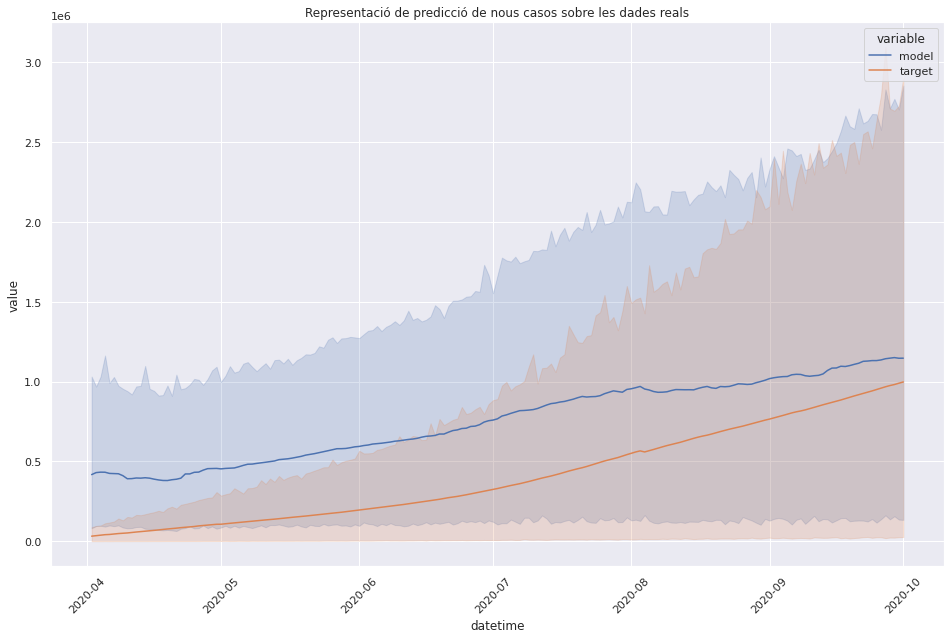

In [39]:
data = dataset[dataset.datetime > '2020-04-01'] #Afago a partir del 2020
pred, ground = aplicar_regressor_lineal(data.loc[:, data.columns != 'total_cases'], data[['total_cases']])
df = pd.DataFrame()
df['datetime'] = data['datetime'][-len(pred.ravel()):]
df['model'] = pred.ravel()
df['target'] = ground

f, ax = plt.subplots(figsize=(16, 10))
g = sns.lineplot(data=pd.melt(df, ['datetime']), x = 'datetime', y = 'value', hue = 'variable',  ax = ax)
g.set_title('Representació de predicció de nous casos sobre les dades reals')
plt.xticks(rotation=45)
plt.show()


2. Comparem un target amb cada atribut


Comparo l'error de predir el valor dels total cases amb tots els atributs nuèrics del dataset. He fet l'error com el valor absolut de la diferència entre les prediccions i el ground truth, ja que al no estar normalitzades les dades, si feia l'error al cuadrat, obtenia valors molt elevats.

Veient les dades següents, podem veure que per predir el número total de casos,  com es d'esperar, obtenim uns errors més baixos quan fem la predicció amb atributs com els nous casos o el total de morts.

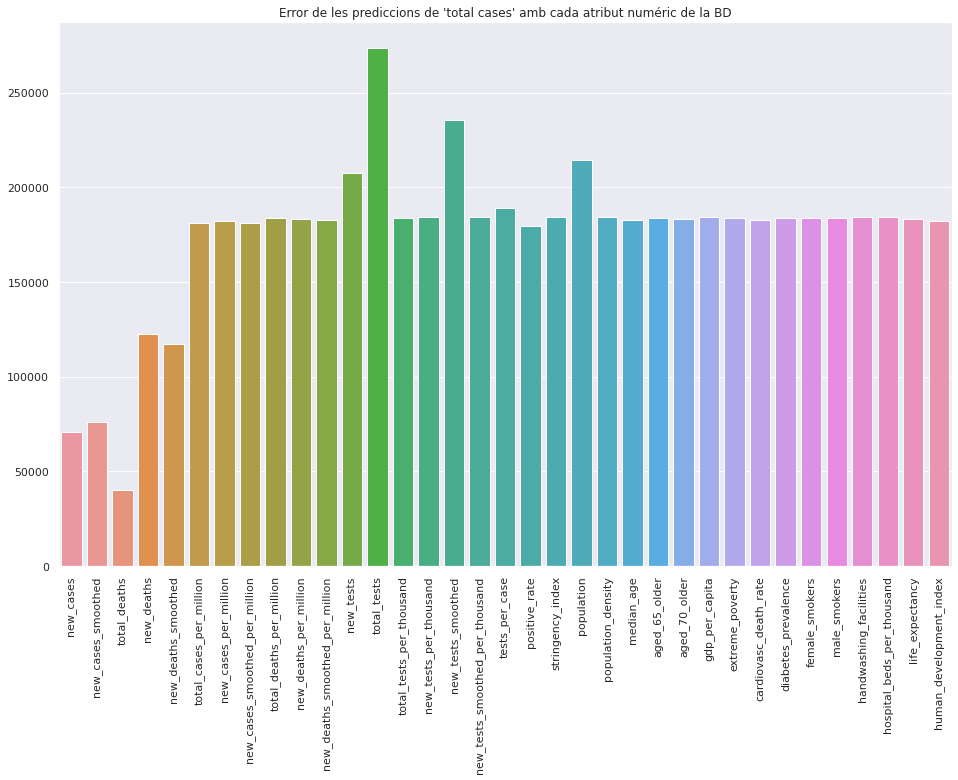

In [31]:
target = dataset[['total_cases']]
data = dataset.select_dtypes(include = [np.number])
data = data.loc[:,data.columns != 'total_cases']
df = pd.DataFrame()
for col in data.columns:
    pred, ground = aplicar_regressor_lineal(data[[col]], target)
    df[col] = [calcula_metrica_error(pred, ground, 'total_cases', 'mse')]

f, ax = plt.subplots(figsize=(16, 10))
g = sns.barplot(data = df, ax = ax)
g.set_title("Error de les prediccions de 'total cases' amb cada atribut numéric de la BD")
plt.xticks(rotation=90)
plt.show()

3. És millor o pitjor que utilitzant totes les dades? Per què?

Tal i com podem veure si mirem les diferències entre el primer gràfic i el segon, l'error del primer és molt més petit que qualsevol dels erros calculats amb el predictor amb un sol atribut. Això es lògic ja que com més dades i atributs tenim, més factors té en compte el regressor a l'hora de fer la predicció.

4. Tenen alguna relació els atributs amb distribucions Gaussianes i els que tenen un error més petit?

Efectivament, tot i que en la BD no trobem cap atribut que segueixi totalment una distribució gaussiana, els atributs 'total deaths' i 'new cases' tenen una distribució semblant a la gaussiana i donen un error més petit.

5. Què passa si normalitzes les dades? El error és més baix? 

Sí, tal i com podem veure a continuació, el error si fem servir el linear regressor amb totes les dades normalitzades per predir 'total cases', obtenim un error molt més baix.

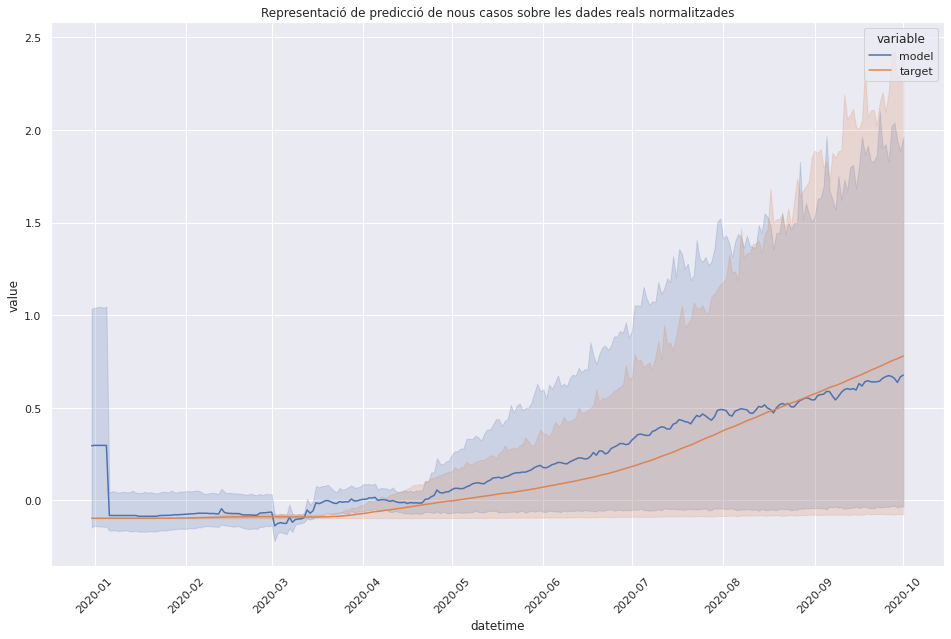

In [43]:
datanorm = normalitzador_de_dades(dataset)

pred, ground = aplicar_regressor_lineal(datanorm.loc[:, datanorm.columns != 'total_cases'], datanorm[['total_cases']])
df = pd.DataFrame()
df['datetime'] = dataset['datetime'][-len(ground):]
df['model'] = pred.ravel()
df['target'] = ground

f, ax = plt.subplots(figsize=(16, 10))
g = sns.lineplot(data=pd.melt(df, ['datetime']), x = 'datetime', y = 'value', hue = 'variable',  ax = ax)
g.set_title('Representació de predicció de nous casos sobre les dades reals normalitzades')
plt.xticks(rotation=45)
plt.show()


6. Significa això que el regressor és més precís? Passa el mateix amb altres mètriques?

Sí, el regressor és més precís quan normalitzem les dades, ja sigui aplicant la funció de normalització aplicada (x-mean(x))/sd(x) o podriem haver aplicat un normalitzador de màxim i mínim, tot i que obtinc més presició amb l'actual. 
El fet de tenir tots els valors en un rang tancat fa que el regressor sigui més precís a l'hora de calcular coeficients.


7. Heu après un LinearRegression o un SGDRegressor? Sabeu quines diferencies hi ha? Compareu-los [Pista](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn-pandas)

El regressor lineal utilitza la diferència de quadrats per buscar la distància mínima a tots els punts i es queda amb el polinomi solució mentre que el SGD regressor, en canvi, té en compte el descens de gradient estocàstic que és un mètode iteratiu per optimitzar una funció objectiu. Comença des de paràmetres aleatoris i en cada iteració s'acosta a la solució òptima. És el que hem programat nosaltres al apartat C.


## C. Demostració d'assoliment (A+B en una nova BBDD) (20%)

La puntuació d'aquesta secció dependrà de la originalitat, i el treball realizat l'analisis i procesat d'una base de dades alternativa de lliure elecció. Recordeu que podeu reaprofitar la majoria del codi si ho heu implementat en funcions.


**Incendis Forestals**

He triat una Base de Dades anomenada Forest Fires on hi han registrades diferents condicions meteorològiques i factors del subsòl i el propi sòl que es volen relacionar amb l'àrea de bosc que es crema quan es produeix un incendi, tal i com indica la documentació

Així doncs, l'objectiu es predir l'area de bosc que es cremara tenint en compte les condicions meteorològiques i del sòl.

Les dades corresponen als boscs del sud de Portugal, les coordenades x i y estan relatives d'allà, no són coordenades geogràfiques reals.

In [233]:
dataset = load_dataset('forestfires.csv')
dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,oct,tue,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,oct,sat,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,mar,fri,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,mar,sun,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.600,56.700,665.600,1.900,27.800,32,2.700,0.000,6.440
513,2,4,aug,sun,81.600,56.700,665.600,1.900,21.900,71,5.800,0.000,54.290
514,7,4,aug,sun,81.600,56.700,665.600,1.900,21.200,70,6.700,0.000,11.160
515,1,4,aug,sat,94.400,146.000,614.700,11.300,25.600,42,4.000,0.000,0.000


### Preguntes a respondre
1. Dimensionalitat de la BBDD. Quants exemples, quantes caracteristiques tenim.
2. Com són les caracteristiques?
3. Hi tenim totes les dades (quin % de dades tenim)
4. Quin tipus de atributs tenim a la base de dades.
5. Mostra els atributs més rellevants.
6. Quins atributs están més correlacionats. Mostra'ls.
7. Mostra (almenys) 5 tipus diferents de gràfiques sobre les dades.
8. Els valors es troben tots a la mateixa escala? Ens importa?
9. Quins atributs tenen una distribució Guassiana?
10. Quin és l'atribut objectiu? Per què?


## Resposta
1. La BD 'forest fires' consta de 517 files i 13 atributs. Els atributs X i Y corresponen a les coordenades on s'ha prodït l'incendi, month i day són el dia i el mes respectius. Els següents paràmetres que trobem en forma de nombres enters contenen des de la temperatura fins a la velocitat del vent, tots ells factors clau per poder descriure l'àrea de propagació d'un incendi.
2. \n
2. i 4 La BD consta de 2 atributs coordenades, 2 atributs de datetime i la resta són atributs de mesures meteorològiques tècniques, de les cuals he après el significat per poder entendre les mesures.
3. Tal i com calculem a la cel·la següent, tenim un 100% de les dades.
5. Els atributs més rellevants (tal i com descriu la documentació) són la velocitat del vent, la humitat i la temperatura així com el FFMC que representa la capacitat del terreny d'inflamarse.
6. En la següent cel·la es mostren els atributs més correlacionats. Amb el resultat, podem veure que no es troba molta correlació entre els atributs.
7. Els gràfics es troben 2 cel·les posteriors.
8. Tots els valors no es troben en la mateixa escala, ja que tenim alguns valors com el FFMC que es representa entre els valors 0 i 1 i la temperatura qeu esta en graus Cº que poden variar des dels 4 fins als 40.
9. A continuació es mostren les distribucions dels atributs.
10. L'atribut objectiu és l'area, ja que volem predir quantes hectàres es poden cremar segons l'incendi per tal de poder desplegar un tipus de dispositiu o altre antiincendis.

In [137]:
print(f'Tenim un {sum(dataset.count())/(dataset.shape[0]*dataset.shape[1]) * 100} % de dades')

Tenim un 100.0 % de dades


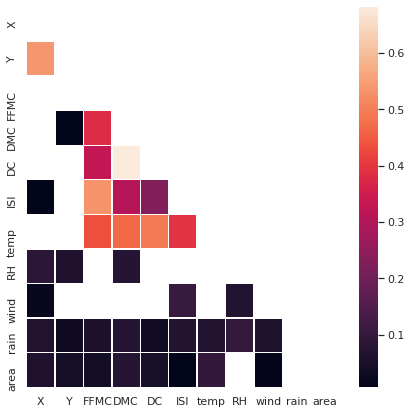

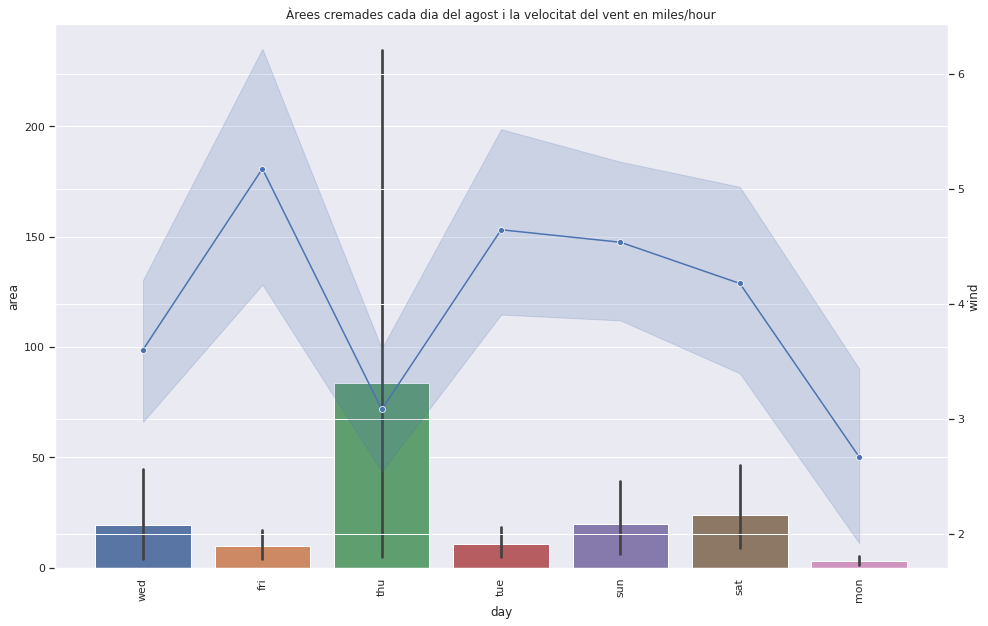

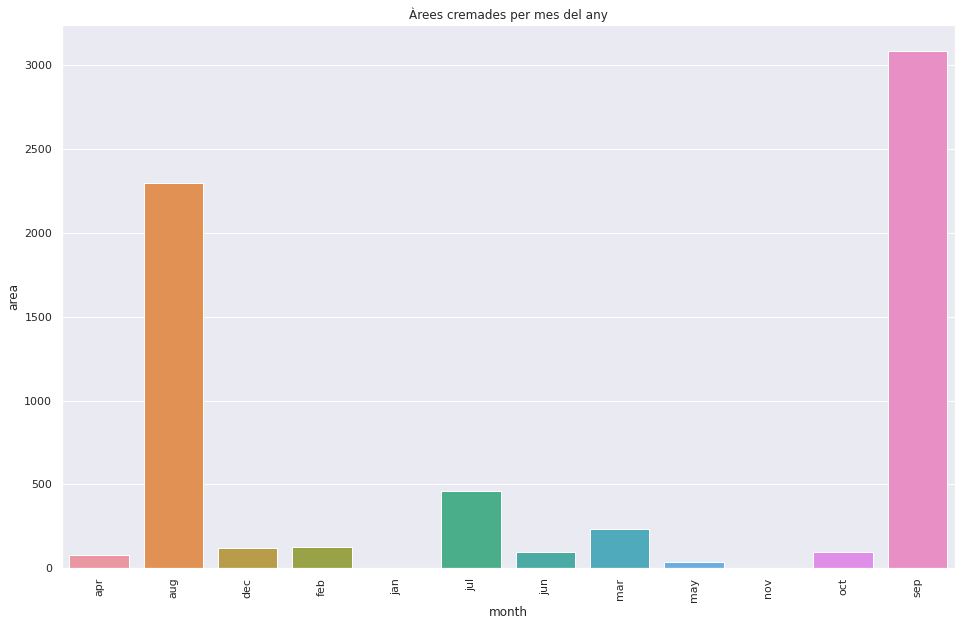

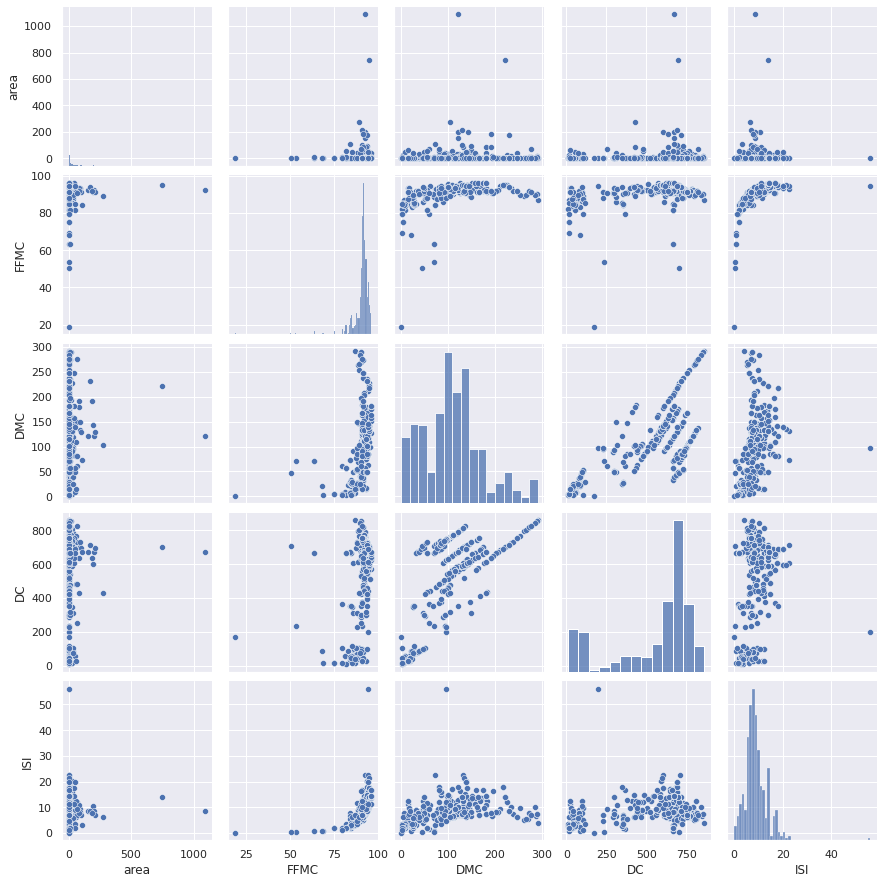

In [234]:
#plots
#Plot 0, corr
mostra_correlacions(dataset, 0)

#Plot 1
agost = dataset[dataset.month == 'aug']
agost = agost[agost.area > 0] #Afagem dies que hi han hagut incendis
#mirem les arees cremades i la velocitat del vent
f, ax = plt.subplots(figsize=(16, 10))
g = sns.barplot(data = agost, x = 'day', y = 'area', ax = ax)
plt.xticks(rotation = 90)
ax2 = ax.twinx()
g = sns.lineplot(data = agost, x = 'day', y = 'wind',marker = 'o', ax =  ax2)
g.set_title("Àrees cremades cada dia del agost i la velocitat del vent en miles/hour")
plt.xticks(rotation=90)
plt.show()

#Plot 2, total d'area cremada per mesos
nan = dataset[['month', 'area']].groupby( by = ['month'], as_index = False).sum()
f, ax = plt.subplots(figsize=(16, 10))
g = sns.barplot(data = nan, x = 'month', y = 'area', ax = ax)
g.set_title("Àrees cremades per mes del any")
plt.xticks(rotation=90)
plt.show()

#Plot 3, pairplot de la relació entre l'àrea cremada i altres valors.
g = sns.pairplot(data = dataset[['area', 'FFMC', 'DMC', 'DC', 'ISI']])


### Preguntes a respondre
1. Aprén un Regressor Lineal amb totes les dades
2. Calcula l'error quadràtic mitjà del regressor per a cada un dels atributs de la base de dades. Quin atribut té l'error més baix. Mostra'ls.
3. És millor o pitjor que utilitzant totes les dades? Per què?
4. Tenen alguna relació els atributs amb distribucions Gaussianes i els que tenen un error més petit?
5. Què passa si normalitzes les dades? El error és més baix? 
6. Significa això que el regressor és més precís? Passa el mateix amb altres mètriques?
7. Heu après un LinearRegression o un SGDRegressor? Sabeu quines diferencies hi ha? Compareu-los [Pista](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn-pandas)



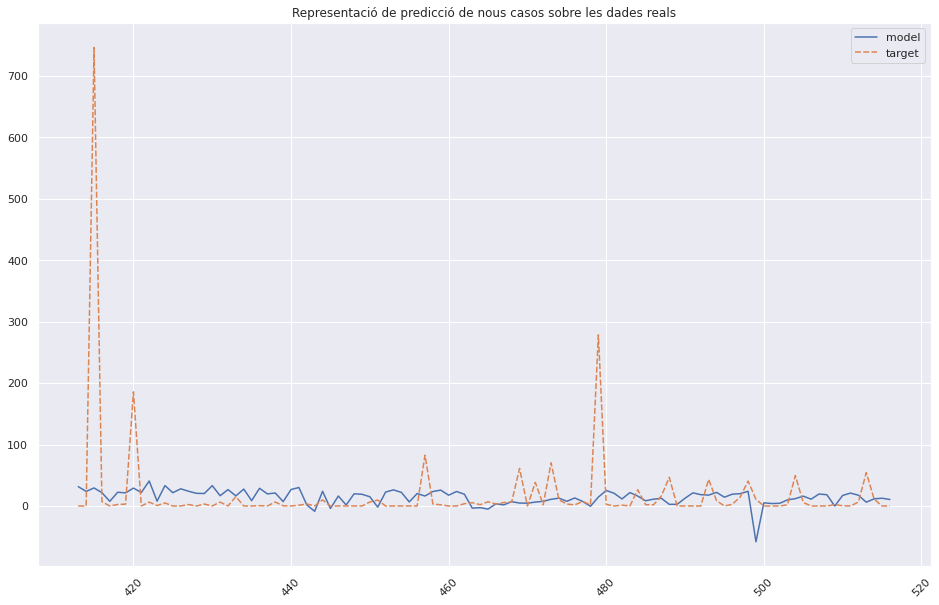

L'error és de 3157.492368079054


In [213]:
pred, ground = aplicar_regressor_lineal(dataset.loc[:, dataset.columns != 'area'], dataset[['area']])
df = pd.DataFrame()
df['month'] = dataset['month'][-len(pred.ravel()):]
df['model'] = pred.ravel()
df['target'] = ground

f, ax = plt.subplots(figsize=(16, 10))
g = sns.lineplot(data=df,  ax = ax)
g.set_title('Representació de predicció de nous casos sobre les dades reals')
plt.xticks(rotation=45)
plt.show()

print(f"L'error és de {calcula_metrica_error(pred, ground, 'area', 'r2')}")

2. Calcula l'error quadràtic mitjà del regressor per a cada un dels atributs de la base de dades. Quin atribut té l'error més baix. Mostra'ls.

El atribut que té l'error més baix és l'atribut temperatura.

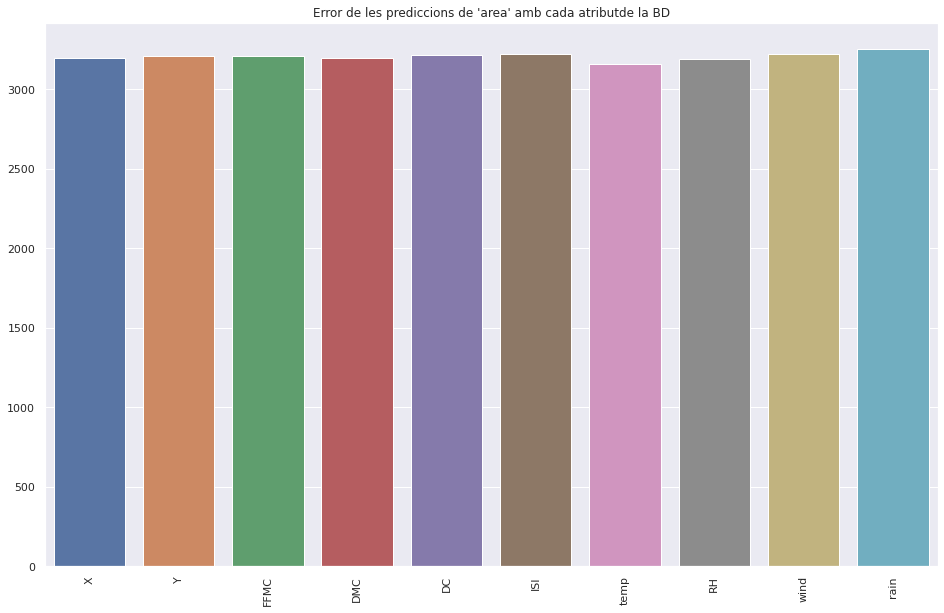

In [199]:
target = dataset[['area']]
data = dataset.select_dtypes(include = [np.number])
data = data.loc[:,data.columns != 'area']
df = pd.DataFrame()
for col in data.columns:
    pred, ground = aplicar_regressor_lineal(data[[col]], target)
    df[col] = [calcula_metrica_error(pred, ground, 'area', 'r2')]

f, ax = plt.subplots(figsize=(16, 10))
g = sns.barplot(data = df, ax = ax)
g.set_title("Error de les prediccions de 'area' amb cada atributde la BD")
plt.xticks(rotation=90)
plt.show()

3. És millor o pitjor que utilitzant totes les dades? Per què?

Tal i com veiem, l'error és més baix quan fem servir totes les dades, de totes maneres però, amb les dades sense normalitzar l'error no és significativament més petit amb totes les dades que les prediccions per cada atribut.

5. Què passa si normalitzes les dades? El error és més baix? 


In [223]:
norm = normalitzador_de_dades(dataset)
pred, ground = aplicar_regressor_lineal(norm.loc[:, norm.columns != 'area'], norm[['area']])
print(f"Amb les dades normalitzades l'error és de {calcula_metrica_error(pred, ground, 'area', 'r2')}")


Amb les dades normalitzades l'error és de 0.7792307752593477


Efectivament, podem veure que amb les dades normalitzades reduïm moltissim l'error i fins i tot obtenim un error proper a 0.

6. Significa això que el regressor és més precís? Passa el mateix amb altres mètriques?

Sí, el fet de reduïr el error en casi 3000 entre el model amb les dades normalitzades i el model amb les dades sense normalitzar demostra que la normalització de les dades és un procés bàsic per a la creació de models que puguin fer prediccions més acertades. 

## D. Implementació Regressor Lineal (20%)

En aquest exercici, es tracta d'implementar en python el procés de descens del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(w) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; w) - y^{i})^2 + \lambda\sum_{j=1}^{n}(w_{j}^2) \right]$$

Fixeu-vos que $J$ retorna el `mse`. Per a trobar $w_j$, repetir fins convergència:
$$w_0 = w_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot 1$$
$$w_j = w_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}w_{j} \right]$$


ó:

$$w_{j} := w_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $w_0$ i $w_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabeu quin resultat hauríeu d'obtenir. O no, perquè la vostra implementació pot ser millor! En concret, es tracta de desenvolupar aquestes tasques:

* Definir la funció de cost i del gradient

* Estudiar com l'ús de regularitzadors afecta el resultat: overfitting, underfitting, etc. 

* Visualització de les dades a analitzar i explicació pas a pas del procediment   

* Visualització del procés de descens de gradient 

* Modificar el learning rate i el nombre d'iteracions 

<img src="https://miro.medium.com/max/810/1*UUHvSixG7rX2EfNFTtqBDA.gif">

Per a la implementació us podeu basar en el següent esquelet:

**RESPOSTA**

En la cel·la següent està el regressor per predir una recta que he implementat jo tenint en compte les explicacions de teoria i les instruccions donades a la part superior del notebook. Tot i haver-ho intentat i haver-hi dedicat hores, no he conseguit fer un regressor ja que pel que he pogut veure, al principi comença des d'un valor aleatori a continuació es van actualitzant els valors amb les iteracions del update i arriba a cert punt on l'error és mínim però no para allà, sinó que segueix i l'error només fa que augmentar i acabo amb valors d'infinit tant en l'error com en els coeficients de la recta i finalment em dóna error el programa. 

Posteriorment, he intentat realitzar les respostes amb el Regressor Polinomial que sens va donar a classe ja programat però em trobo amb el mateix problema, els coeficiens m'acaben amb valors infinits i no obtinc cap polinomi al final. 

Entenc que estic fent algun càlcul dels pesos malament, no tinc bé la condició de parada o les dades que estic introduïnt no són adients per a un regressor lineal.

In [127]:
class Regressor0(object):
    def __init__(self, w0 = 1, w1 = 1, alpha = 0.005, landa = 0.5):
        # Inicialitzem w0 i w1 
        self.w0 = w0
        self.w1 = w1
        self.alpha = alpha
        self.landa = landa
        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        return self.w1 * x + self.w0

    
    def __update(self, x, y):
        # actualitzar aqui els pesos donada la x i la y real.
        # h = fer prediccio(x)
        h = self.predict(x)   
        n = len(x)
        
        # calcular gradient w0
        Jw0 = self.w0 - self.alpha * (1/n) * np.sum(h - y)

        # calcular gradient w1
        # amb landa Jw1 = self.w1 * (1 - self.alpha*self.landa/len(x)) - (self.alpha*self.landa/len(x) * sum([(h[i] - y[i]) * x[i] for i in range(len(x))]))
        Jw1 = self.w1 - self.alpha * (1/len(x)) * np.sum((h - y) * x)
        
        # actualitzar w0 amb alpha
        self.w0 = Jw0
        # actualitzar w1 amd alpha
        self.w1 = Jw1
        # retornar el error
        err = 1/2*len(x) * sum((self.predict(x) - y)**2) #+ self.landa * (self.w0**2 + self.w1**2)
        return err
    
    def fit(self, x, y, max_iter=1000, epsilon=1):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        count = 0
        error = 1000000
        last_error = error
        while count < max_iter and error > epsilon:
            count += 1
            error = self.__update(x , y)
            print(f'It : {count}\tErr: {error}')
            
       

It : 1	Err: [1.35469808e+11]
It : 2	Err: [1.4409517e+14]
It : 3	Err: [1.53269889e+17]
It : 4	Err: [1.63028774e+20]
It : 5	Err: [1.73409019e+23]
It : 6	Err: [1.84450188e+26]
It : 7	Err: [1.96194362e+29]
It : 8	Err: [2.08686301e+32]
It : 9	Err: [2.21973619e+35]
It : 10	Err: [2.36106956e+38]
It : 11	Err: [2.5114018e+41]
It : 12	Err: [2.67130589e+44]
It : 13	Err: [2.84139127e+47]
It : 14	Err: [3.0223062e+50]
It : 15	Err: [3.2147402e+53]
It : 16	Err: [3.41942672e+56]
It : 17	Err: [3.63714589e+59]
It : 18	Err: [3.8687275e+62]
It : 19	Err: [4.11505421e+65]
It : 20	Err: [4.37706485e+68]
It : 21	Err: [4.65575803e+71]
It : 22	Err: [4.95219595e+74]
It : 23	Err: [5.26750844e+77]
It : 24	Err: [5.60289728e+80]
It : 25	Err: [5.95964074e+83]
It : 26	Err: [6.3390985e+86]
It : 27	Err: [6.74271681e+89]
It : 28	Err: [7.172034e+92]
It : 29	Err: [7.62868635e+95]
It : 30	Err: [8.11441433e+98]
It : 31	Err: [8.63106922e+101]
It : 32	Err: [9.18062016e+104]
It : 33	Err: [9.7651617e+107]
It : 34	Err: [1.03869217e

/home/pol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in multiply
/home/pol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in multiply
/home/pol/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/pol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


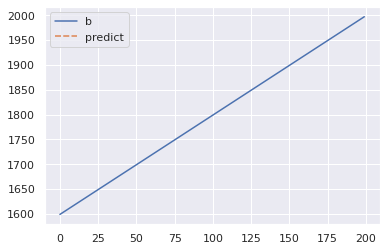

In [133]:
a = np.arange(1000)
b = np.arange(1000)
b = 2*b - 1
model = Regressor0()
model.fit(a[:int(len(a)*0.8)].reshape(-1, 1), b[:int(len(b) *0.8)].reshape(-1, 1), max_iter=1000, epsilon=50)

prova = pd.DataFrame()
prova['b'] = b[int(len(a)*0.8):]
prova['predict'] = model.predict(a[int(len(b)*0.8):])

sns.lineplot(data = prova)



Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? 
2. Quins valors de learning rate convergeixen més ràpid a la solució òptima? 
3. Com influeix la inicialització del model en el resultat final? 
4. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?
5. Evalueu mètriques de execució




## (Extra) Implementació Regresor polinomial (+10%, max: 10pts)
1. Quins parametres heu de cambiar al vostre Regressor per tal de poder predir amb funcions polinomials?
2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?
3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?
4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 


In [235]:
class RegressorPolinomial(object):
    def __init__(self, alpha=1e-2):
        # Inicialitzem w
        self.w = None
        self.alpha = alpha

    def __initialize_w(self, n_vars):
        self.d = n_vars
        # diferents formes d'inicialitzar els pesos
        self.w = np.random.random(n_vars)


    def score(self, x, y):
        return np.mean((self.predict(x)-y)**2)

    def predict(self, x):
        # implementar aqui la funció de prediccio
        return np.dot(x, self.w[1:]) + self.w[0]

    def __update(self, x, y):
        # actualitzar aqui els pesos donada la x i la y real.
        h = self.predict(x)
        n_samples = len(y)

        # calcular gradient w..
        gradient = np.dot((h-y), np.hstack([np.ones((n_samples, 1)), x])) / n_samples

        # actualitzar w0 amb alpha
        self.w = self.w - self.alpha * gradient

        # retornar el error
        return self.score(x, y)

    def __update_in_more_lines(self, x, y):
        # actualitzar aqui els pesos donada la x i la y real.
        h = self.predict(x)
        n_samples = len(y)

        # # calcular gradient w..
        gradient = np.zeros(self.d)
        for i in range(self.d): 
            if i == 0:
                gradient[i] = np.sum(h-y) / n_samples
            else:
                gradient[i] = np.sum((h-y) * x[:, i-1]) / n_samples

        # actualitzar w amb alpha
        self.w[0] = self.w[0] - self.alpha * gradient[0]
        self.w[1:] = self.w[1:] - self.alpha * gradient[1:]   # ho separem per si hem de regularitzar

        # retornar el error
        return self.__loss(self.predict(x), y)

    def fit(self, x, y, max_iter=1000, epsilon=1e-5):
        if len(x.shape) > 1:
            n_vars = x.shape[1]
        else:
            raise AttributeError("Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.")

        y = y.ravel()

        self.__initialize_w(n_vars+1)

        current_error = self.score(x, y)
        last_error = current_error + epsilon * 10

        iter = 0
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        while iter < max_iter and abs(last_error - current_error) > epsilon:
            last_error = current_error
            current_error = self.__update(x, y)
            iter += 1
            print("Iter {}: error {}".format(iter, current_error))


        

In [236]:
a = np.arange(1000)
b = np.arange(1000)
b = 2*b - 1
model = RegressorPolinomial()
model.fit(a[:int(len(a)*0.8)].reshape(-1, 1), b[:int(len(b) *0.8)].reshape(-1, 1), max_iter=1000, epsilon=50)

prova = pd.DataFrame()
prova['b'] = b[int(len(a)*0.8):]
prova['predict'] = model.predict(a[int(len(b)*0.8):])

sns.lineplot(data = prova)

Iter 1: error 2938824833344.203
Iter 2: error 1.331241150647751e+19
Iter 3: error 6.030311779969055e+25
Iter 4: error 2.7316358231519057e+32
Iter 5: error 1.2373878072296109e+39
Iter 6: error 5.6051709840069506e+45
Iter 7: error 2.539053769270216e+52
Iter 8: error 1.1501511839049533e+59
Iter 9: error 5.210002883153529e+65
Iter 10: error 2.3600488720369156e+72
Iter 11: error 1.0690647977206848e+79
Iter 12: error 4.8426943834394035e+85
Iter 13: error 2.193663933317806e+92
Iter 14: error 9.936950530670542e+98
Iter 15: error 4.501281365357084e+105
Iter 16: error 2.0390092380528e+112
Iter 17: error 9.236389230991438e+118
Iter 18: error 4.1839381810670095e+125
Iter 19: error 1.8952577966564643e+132
Iter 20: error 8.585217946196006e+138
Iter 21: error 3.8889678920574855e+145
Iter 22: error 1.761640922832403e+152
Iter 23: error 7.979954648985109e+158
Iter 24: error 3.6147931950555278e+165
Iter 25: error 1.637444123154456e+172
Iter 26: error 7.417362797187289e+178
Iter 27: error 3.3599479876669

/home/pol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
/home/pol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars


ValueError: shapes (200,) and (1,) not aligned: 200 (dim 0) != 1 (dim 0)